In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from scipy.stats import randint
from imblearn.over_sampling import SMOTE

df = pd.read_csv('BankLoanApproval.csv')
print(df.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  IA35XVH6ZO   28  140466      163781          652              94   
1  Y8UETC3LSG   28  149227      139759          375              56   
2  RM6QSRHIYP   41   23265       63527          829              87   
3  GX5YQOGROM   53  117550       95744          395             112   
4  X0BVPZLDC0   57  139699       88143          635             112   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               2          9.08        48      0.23  High School   
1               3          5.84        36      0.80          PhD   
2               4          9.73        60      0.45     Master's   
3               4          3.58        24      0.73  High School   
4               4          5.63        48      0.20     Master's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0     Unemployed       Married          No            No   Education   
1      Full-time    

In [2]:
#Data description
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255327 entries, 0 to 255326
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255327 non-null  object 
 1   Age             255327 non-null  int64  
 2   Income          255327 non-null  int64  
 3   LoanAmount      255327 non-null  int64  
 4   CreditScore     255327 non-null  int64  
 5   MonthsEmployed  255327 non-null  int64  
 6   NumCreditLines  255327 non-null  int64  
 7   InterestRate    255327 non-null  float64
 8   LoanTerm        255327 non-null  int64  
 9   DTIRatio        255327 non-null  float64
 10  Education       255327 non-null  object 
 11  EmploymentType  255327 non-null  object 
 12  MaritalStatus   255327 non-null  object 
 13  HasMortgage     255327 non-null  object 
 14  HasDependents   255327 non-null  object 
 15  LoanPurpose     255327 non-null  object 
 16  HasCoSigner     255327 non-null  object 
 17  Default   

In [3]:
#Descriptive statistics
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000
mean,43.498059,82500.225585,127579.236559,574.266125,59.542516,2.501036,13.492848,36.025896,0.500222,0.116118
std,14.990304,38963.150663,70841.308245,158.904496,34.643129,1.117021,6.636456,16.969297,0.230917,0.320367
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48826.000000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82467.000000,127557.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188986.500000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [4]:
#Number of rows and columns in df
print(df.shape)

(255327, 18)


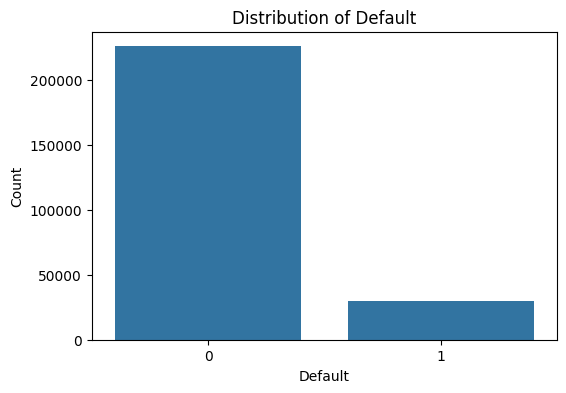

In [5]:
#Check default for all applicants
plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=df)
plt.title("Distribution of Default")
plt.xlabel("Default")
plt.ylabel("Count")
plt.show()

In [6]:
print("Number of class 0 (Non-default) instance: ", df[df["Default"] == 0].shape[0])
print("Number of class 1 (Default) instance: ", df[df["Default"] == 1].shape[0])

Number of class 0 (Non-default) instance:  225679
Number of class 1 (Default) instance:  29648


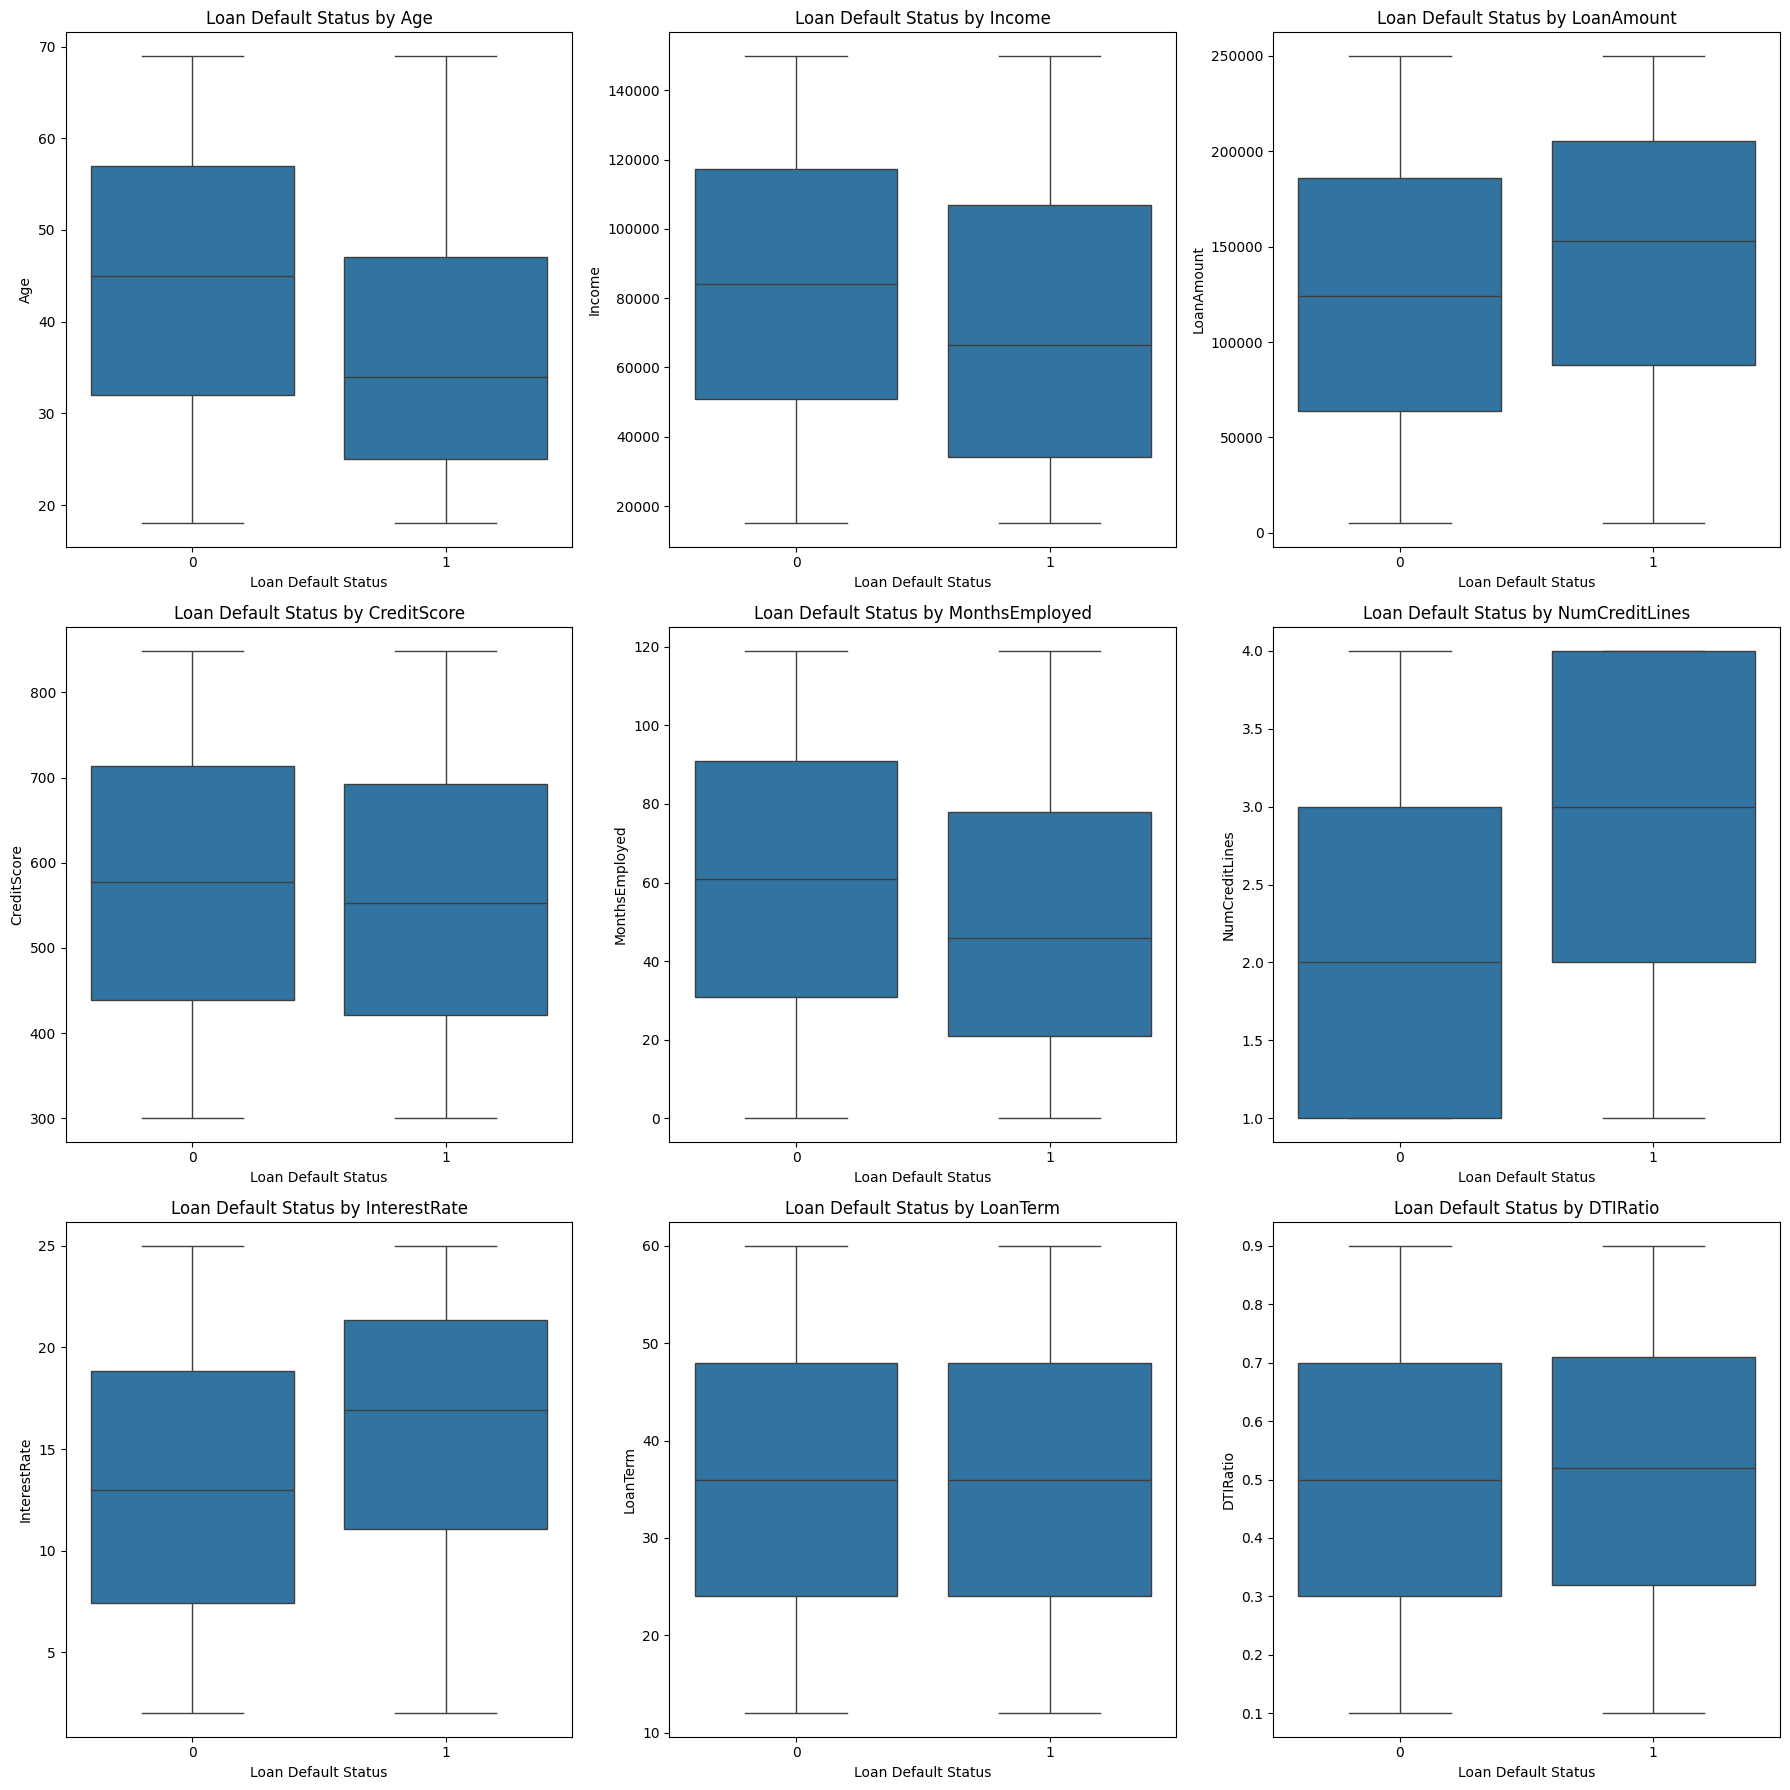

In [7]:
numerical_vars = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
num_plots = len(numerical_vars)
num_rows = num_plots // 3 + (1 if num_plots % 3 > 0 else 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6*num_rows))

for i, var in enumerate(numerical_vars):
    row = i // 3
    col = i % 3
    sns.boxplot(x='Default', y=var, data=df, ax=axes[row][col])
    axes[row][col].set_title(f'Loan Default Status by {var}')
    axes[row][col].set_xlabel('Loan Default Status')
    axes[row][col].set_ylabel(var)

# Hide empty subplots
for i in range(num_plots, num_rows*3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()


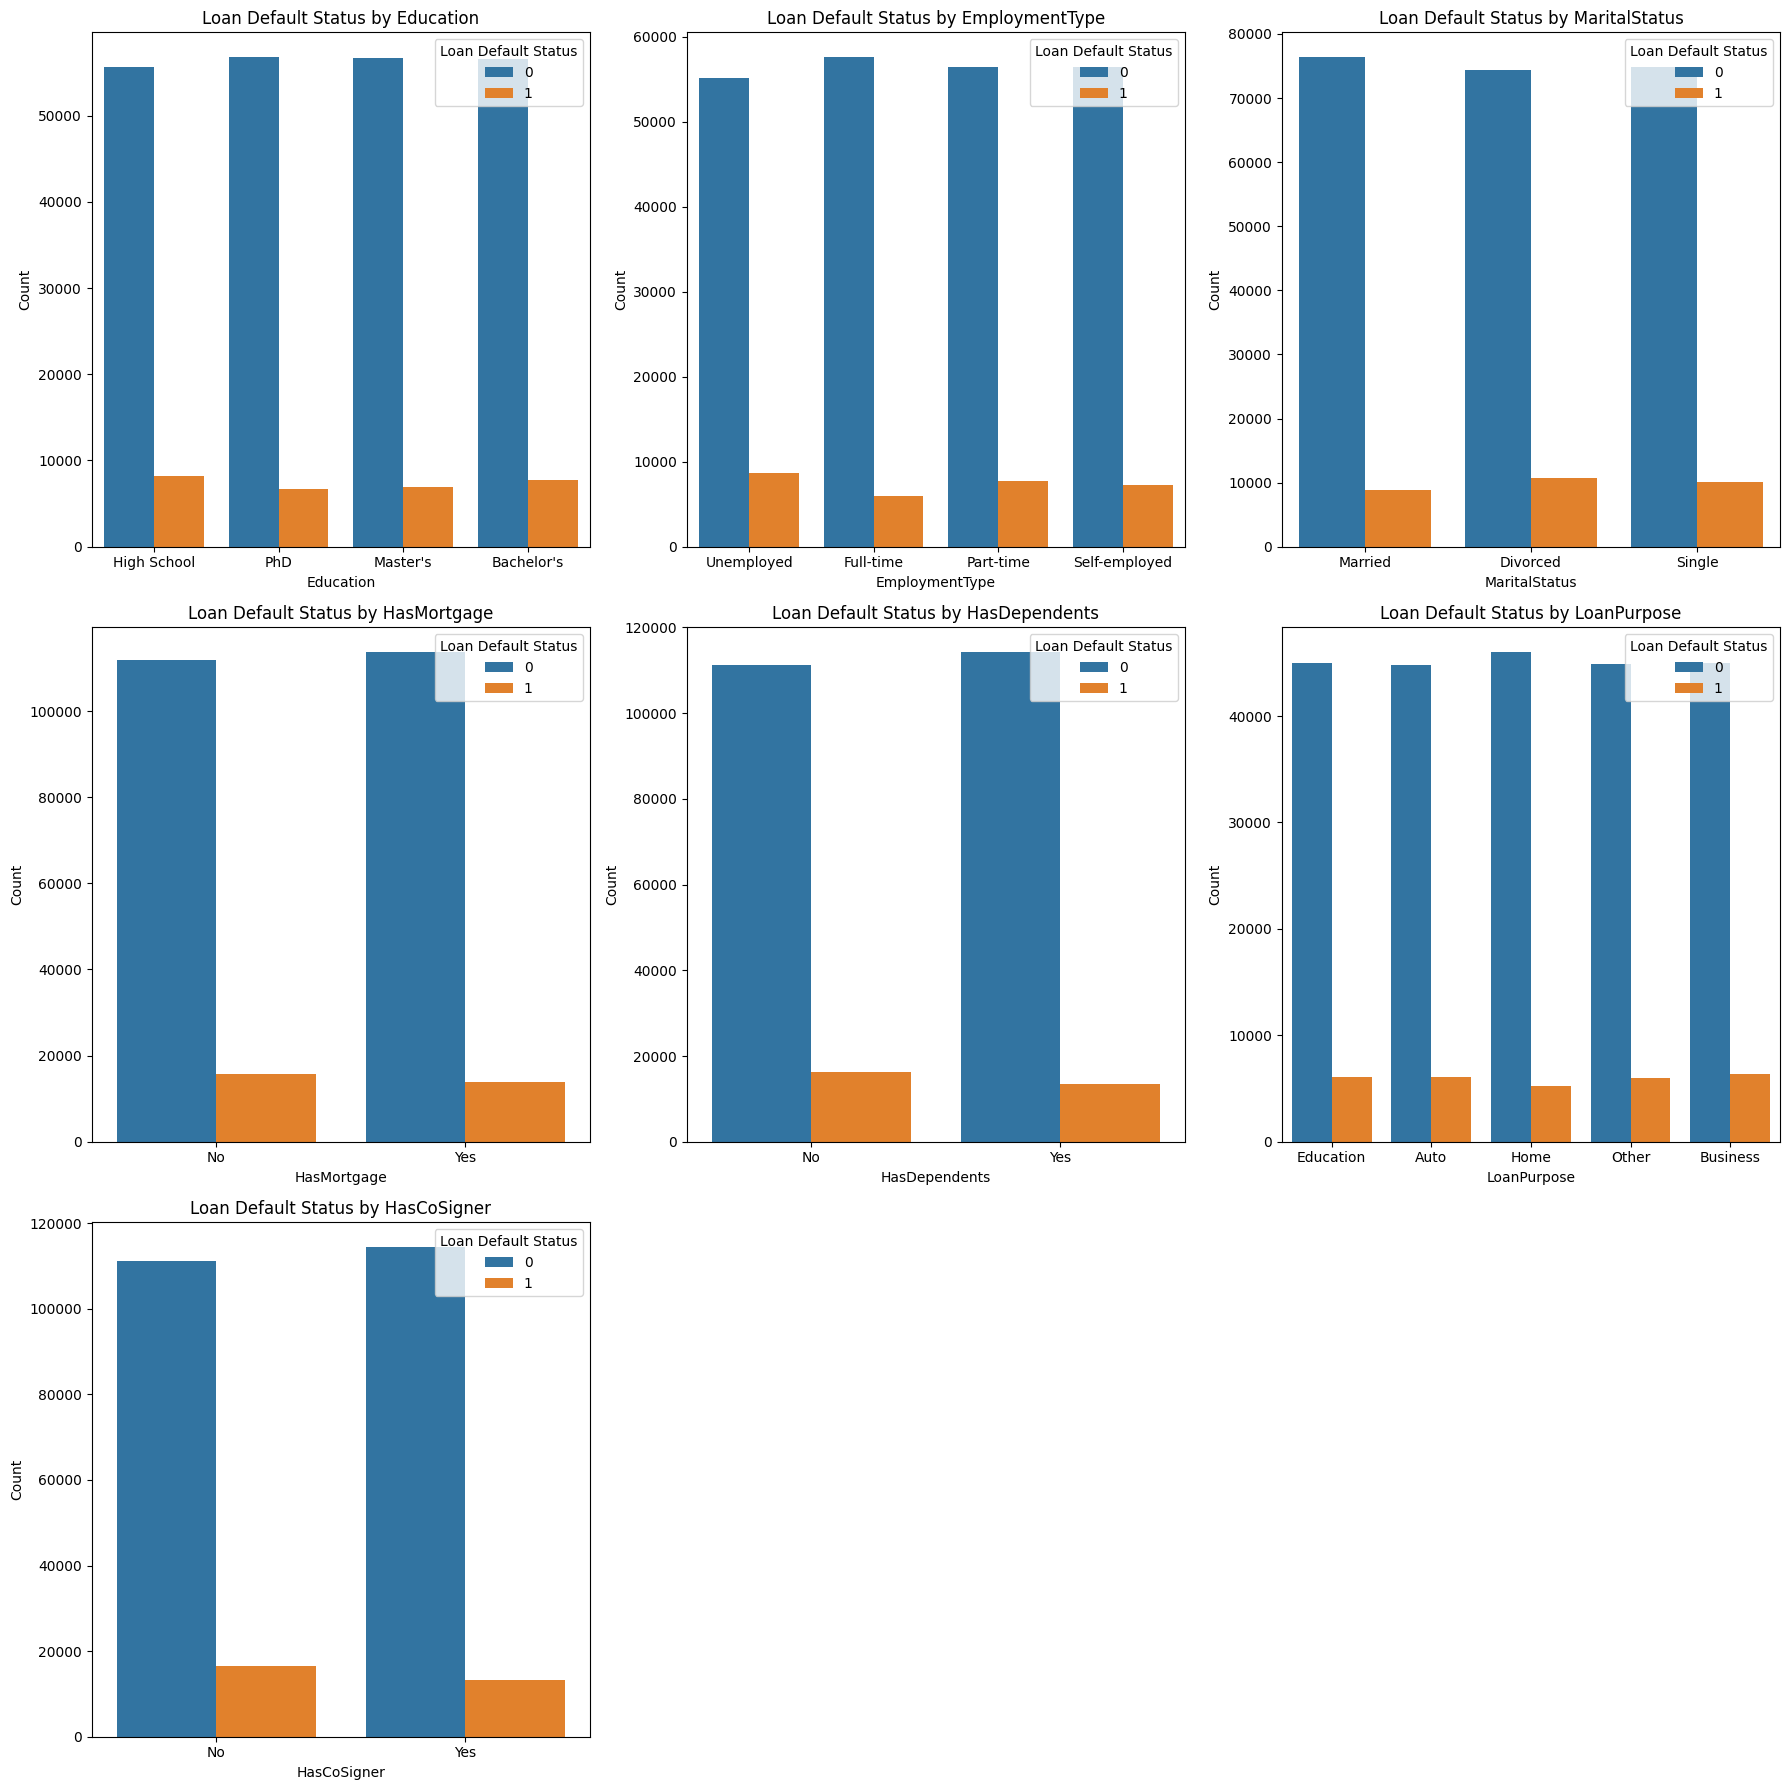

In [8]:
categorical_vars = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
num_plots = len(categorical_vars)
num_rows = num_plots // 3 + (1 if num_plots % 3 > 0 else 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6*num_rows))

for i, var in enumerate(categorical_vars):
    row = i // 3
    col = i % 3
    sns.countplot(x=var, hue='Default', data=df, ax=axes[row][col])
    axes[row][col].set_title(f'Loan Default Status by {var}')
    axes[row][col].set_xlabel(var)
    axes[row][col].set_ylabel('Count')
    axes[row][col].legend(title='Loan Default Status')

# Hide empty subplots
for i in range(num_plots, num_rows*3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()


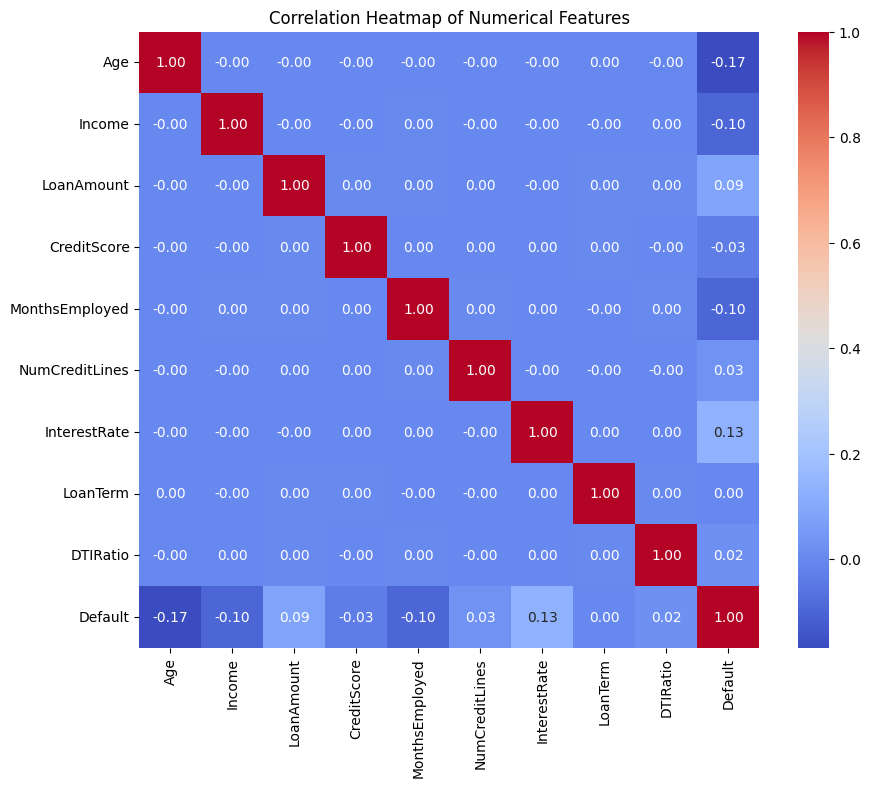

In [30]:
# Correlation heatmap of numerical features
corr_df = df.drop(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
#Data preprocessing
#Check missing values for dataset
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [ ]:
#Check duplicate rows for dataset
df.duplicated().any()

False

In [9]:
#Calculate the number of unique value in each variable
print("Number of unique value in a variable")
for column in df.columns:
    unique_value_counts = df[column].nunique()
    print(f"'{column}':{unique_value_counts}")

Number of unique value in a variable
'LoanID':255327
'Age':52
'Income':114619
'LoanAmount':158725
'CreditScore':550
'MonthsEmployed':120
'NumCreditLines':4
'InterestRate':2301
'LoanTerm':5
'DTIRatio':81
'Education':4
'EmploymentType':4
'MaritalStatus':3
'HasMortgage':2
'HasDependents':2
'LoanPurpose':5
'HasCoSigner':2
'Default':2


In [21]:
#Define feature vector and target variable
x = df.drop(['LoanID', 'Default'], axis=1)
y = df['Default']

#Split dataset into training set and test set
x_train, x_temp, y_train, y_temp = train_test_split(x,y,test_size=0.3,random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

print("Training set size: ", x_train.shape[0])
print("Validation set size: ", x_val.shape[0])
print("Testing set size: ", x_test.shape[0])

Training set size:  178728
Validation set size:  38299
Testing set size:  38300


In [22]:
# Find categorical variable, which is object type variable for training set data
x_train_categorical = x_train.select_dtypes(include=['object'])
print(x_train_categorical)

          Education EmploymentType MaritalStatus HasMortgage HasDependents  \
34705      Master's  Self-employed       Married          No           Yes   
91534   High School  Self-employed       Married         Yes            No   
135742          PhD     Unemployed        Single          No           Yes   
38965   High School     Unemployed       Married          No            No   
152605     Master's  Self-employed        Single         Yes           Yes   
...             ...            ...           ...         ...           ...   
119879  High School      Part-time      Divorced          No           Yes   
103694     Master's  Self-employed      Divorced          No            No   
131932     Master's      Full-time        Single          No           Yes   
146867  High School      Full-time       Married          No           Yes   
121958  High School      Full-time        Single         Yes           Yes   

       LoanPurpose HasCoSigner  
34705        Other         Yes

In [23]:
# Find numerical variable for training set data
x_train_numerical = x_train.select_dtypes(exclude=['object'])
print(x_train_numerical)

        Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
34705    43   50782      172606          515              57               3   
91534    68   28312       73052          706              25               4   
135742   52   88058       86839          552             115               3   
38965    67   75037      238521          570              94               1   
152605   20  122808       82166          578             102               4   
...     ...     ...         ...          ...             ...             ...   
119879   65  124385      181686          330             101               3   
103694   52   39904        5178          516              87               4   
131932   69   94366      126748          598              60               1   
146867   54  140153      199561          797              26               3   
121958   61  128082       61705          593              99               3   

        InterestRate  LoanTerm  DTIRati

In [24]:
#Remove outliers in numerical variables using Z-score
from scipy import stats
z = np.abs(stats.zscore(x_train_numerical))
x_train2 = x_train_numerical[(z<3).all(axis=1)]
x_train2.shape

(178728, 9)

In [25]:
# Encoding for training dataset
# Tranform categorical variable into quantitative variable
x_train_cat_encoded = pd.get_dummies(x_train_categorical, drop_first=True)

# Scale the numerical variables before concatenating with categorical variables
scaler = StandardScaler()
x_train_numerical_scaled = scaler.fit_transform(x_train_numerical)

# Convert scaled numerical variables into a DataFrame with column names
x_train_numerical_scaled_df = pd.DataFrame(x_train_numerical_scaled, columns=x_train_numerical.columns, index=x_train_numerical.index)

# Concatenate encoded categorical variables and scaled numerical variables
x_train_processed = pd.concat([x_train_numerical_scaled_df, x_train_cat_encoded], axis=1)
print(x_train_processed.head())

             Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
34705  -0.034294 -0.815934    0.637581    -0.372791       -0.072250   
91534   1.632722 -1.392594   -0.768511     0.830369       -0.995964   
135742  0.565831  0.140702   -0.573785    -0.139718        1.601982   
38965   1.566041 -0.193464    1.568559    -0.026331        0.995795   
152605 -1.567949  1.032511   -0.639786     0.024063        1.226723   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  \
34705         0.445688     -1.406692 -0.707583  1.688273   
91534         1.341111     -0.954764  1.411479  1.688273   
135742        0.445688     -0.475720 -1.413937  1.255511   
38965        -1.345159      0.628490  0.705125 -1.211232   
152605        1.341111     -0.557068 -0.707583  0.043777   

        Education_High School  ...  EmploymentType_Unemployed  \
34705                   False  ...                      False   
91534                    True  ...                      False   
135742           

In [26]:
#Encoding for validation dataset
# Find categorical variable, which is object type variable for validation set data
x_val_categorical = x_val.select_dtypes(include=['object'])

# Find numerical variable for validation set data
x_val_numerical = x_val.select_dtypes(exclude=['object'])

# Tranform categorical variable into quantitative variable
x_val_cat_encoded = pd.get_dummies(x_val_categorical, drop_first=True)

# Scale the numerical variables before concatenating with categorical variables
scaler = StandardScaler()
x_val_numerical_scaled = scaler.fit_transform(x_val_numerical)

# Convert scaled numerical variables into a DataFrame with column names
x_val_numerical_scaled_df = pd.DataFrame(x_val_numerical_scaled, columns=x_val_numerical.columns, index=x_val_numerical.index)

# Concatenate encoded categorical variables and scaled numerical variables
x_val_processed = pd.concat([x_val_numerical_scaled_df, x_val_cat_encoded], axis=1)
print(x_val_processed.head())

             Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
249374  1.242256  0.036544   -0.881548    -0.302496        0.731129   
209752  0.974809  0.364488    1.235472    -0.672763       -1.549465   
151150  0.172469 -1.592574    0.746812    -1.538809        0.990943   
215987 -1.499072  1.300999   -1.401759    -0.227188       -0.336997   
162055 -1.164764  0.495491   -0.087641     1.354287       -0.914363   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  \
249374        1.348297     -0.275680 -0.707070  1.555027   
209752       -0.443180      0.593941 -1.417833 -0.702950   
151150       -0.443180     -0.841385  0.714456  0.252348   
215987       -0.443180      0.794044 -0.707070  0.686574   
162055       -0.443180      1.510203  1.425219  0.947110   

        Education_High School  ...  EmploymentType_Unemployed  \
249374                  False  ...                      False   
209752                  False  ...                      False   
151150           

In [27]:
# Encoding for testing dataset
# Find categorical variable, which is object type variable for testing set data
x_test_categorical = x_test.select_dtypes(include=['object'])

# Find numerical variable for testing set data
x_test_numerical = x_test.select_dtypes(exclude=['object'])

# Tranform categorical variable into quantitative variable
x_test_cat_encoded = pd.get_dummies(x_test_categorical, drop_first=True)

# Scale the numerical variables before concatenating with categorical variables
scaler = StandardScaler()
x_test_numerical_scaled = scaler.fit_transform(x_test_numerical)

# Convert scaled numerical variables into a DataFrame with column names
x_test_numerical_scaled_df = pd.DataFrame(x_test_numerical_scaled, columns=x_test_numerical.columns, index=x_test_numerical.index)

# Concatenate encoded categorical variables and scaled numerical variables
x_test_processed = pd.concat([x_test_numerical_scaled_df, x_test_cat_encoded], axis=1)
print(x_test_processed.head())

             Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
65844   0.233452  0.619176   -0.553485    -1.304957       -0.738768   
126589 -1.100479  0.482542   -0.878464     0.899993       -0.854218   
229083 -0.033334  0.063220   -1.188118    -1.179319        1.310466   
148419 -0.233424 -0.265123   -1.592375    -0.595101       -1.431467   
25019   1.567382  0.675098   -1.720407     1.660104        1.714541   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  \
65844         1.339434     -0.328848  0.699276  1.645913   
126589        0.445529     -0.242718 -0.715492 -1.560416   
229083        0.445529      0.876979  1.406660 -0.390539   
148419        0.445529     -1.295928 -0.008108  0.779337   
25019        -0.448376     -0.307693  1.406660 -1.127128   

        Education_High School  ...  EmploymentType_Unemployed  \
65844                   False  ...                       True   
126589                  False  ...                       True   
229083           

Model Training

Logistic Regression

In [40]:
# Logistic Regression
log_reg_model = LogisticRegression()

# Model Training
log_reg_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = log_reg_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = log_reg_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Validation Set Metrics:
Accuracy: 0.8856889213817594
Precision: 0.6175298804780877
Recall: 0.03493351363533919
F1-score: 0.06612627986348123

Confusion Matrix for validation dataset:
[[33766    96]
 [ 4282   155]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     33862
           1       0.62      0.03      0.07      4437

    accuracy                           0.89     38299
   macro avg       0.75      0.52      0.50     38299
weighted avg       0.86      0.89      0.84     38299


Testing Set Metrics:
Accuracy: 0.8838642297650131
Precision: 0.610236220472441
Recall: 0.03441385435168739
F1-score: 0.06515342580916351

Confusion Matrix:
[[33697    99]
 [ 4349   155]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     33796
           1       0.61      0.03      0.07      4504

    accuracy                           0.88     38300
   macro avg       0.75      0.52      0.50     38300

Naive Bayes

In [41]:
# Define the Naive Bayes model
nb_model = GaussianNB()

# Model Training
nb_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = nb_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = nb_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Validation Set Metrics:
Accuracy: 0.8853494869317736
Precision: 0.6197916666666666
Recall: 0.02681992337164751
F1-score: 0.0514149924389717

Confusion Matrix for validation dataset:
[[33789    73]
 [ 4318   119]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     33862
           1       0.62      0.03      0.05      4437

    accuracy                           0.89     38299
   macro avg       0.75      0.51      0.50     38299
weighted avg       0.86      0.89      0.84     38299


Testing Set Metrics:
Accuracy: 0.8838903394255875
Precision: 0.6446700507614214
Recall: 0.02819715808170515
F1-score: 0.054031057221867684

Confusion Matrix:
[[33726    70]
 [ 4377   127]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     33796
           1       0.64      0.03      0.05      4504

    accuracy                           0.88     38300
   macro avg       0.76      0.51      0.50     3830

Decision Tree

In [42]:
# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Model Training
dt_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = dt_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = dt_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Validation Set Metrics:
Accuracy: 0.8025535914775843
Precision: 0.1987661461345672
Recall: 0.23236421005183683
F1-score: 0.21425602660016624

Confusion Matrix for validation dataset:
[[29706  4156]
 [ 3406  1031]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     33862
           1       0.20      0.23      0.21      4437

    accuracy                           0.80     38299
   macro avg       0.55      0.55      0.55     38299
weighted avg       0.82      0.80      0.81     38299


Testing Set Metrics:
Accuracy: 0.8001044386422976
Precision: 0.1977368622938243
Recall: 0.2289076376554174
F1-score: 0.21218357686766826

Confusion Matrix:
[[29613  4183]
 [ 3473  1031]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     33796
           1       0.20      0.23      0.21      4504

    accuracy                           0.80     38300
   macro avg       0.55      0.55      0.55     38300

Random Forest

In [43]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)  # You can customize the parameters as needed

# Model Training
rf_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = rf_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = rf_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Validation Set Metrics:
Accuracy: 0.8861589075432779
Precision: 0.6842105263157895
Recall: 0.03222898354744196
F1-score: 0.06155832974601808

Confusion Matrix for validation dataset:
[[33796    66]
 [ 4294   143]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     33862
           1       0.68      0.03      0.06      4437

    accuracy                           0.89     38299
   macro avg       0.79      0.52      0.50     38299
weighted avg       0.86      0.89      0.84     38299


Testing Set Metrics:
Accuracy: 0.8839164490861618
Precision: 0.6559139784946236
Recall: 0.02708703374777975
F1-score: 0.05202558635394456

Confusion Matrix:
[[33732    64]
 [ 4382   122]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     33796
           1       0.66      0.03      0.05      4504

    accuracy                           0.88     38300
   macro avg       0.77      0.51      0.50     3830

K-Nearest Neighbors

In [44]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = knn_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = knn_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Validation Set Metrics:
Accuracy: 0.8744092535053134
Precision: 0.3184031158714703
Recall: 0.07369844489519946
F1-score: 0.11969253294289897

Confusion Matrix for validation dataset:
[[33162   700]
 [ 4110   327]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     33862
           1       0.32      0.07      0.12      4437

    accuracy                           0.87     38299
   macro avg       0.60      0.53      0.53     38299
weighted avg       0.82      0.87      0.84     38299


Testing Set Metrics:
Accuracy: 0.8742558746736292
Precision: 0.34462151394422313
Recall: 0.07682060390763766
F1-score: 0.12563543936092955

Confusion Matrix:
[[33138   658]
 [ 4158   346]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     33796
           1       0.34      0.08      0.13      4504

    accuracy                           0.87     38300
   macro avg       0.62      0.53      0.53     383

Support Vector Machine

In [45]:
# Define the SVM model
svm_model = SVC()

# Model Training
svm_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = svm_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = svm_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

Validation Set Metrics:
Accuracy: 0.8841484111856707
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Confusion Matrix for validation dataset:
[[33862     0]
 [ 4437     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     33862
           1       0.00      0.00      0.00      4437

    accuracy                           0.88     38299
   macro avg       0.44      0.50      0.47     38299
weighted avg       0.78      0.88      0.83     38299


Testing Set Metrics:
Accuracy: 0.8824281984334204
Precision: 1.0
Recall: 0.00022202486678507994
F1-score: 0.0004439511653718091

Confusion Matrix:
[[33796     0]
 [ 4503     1]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     33796
           1       1.00      0.00      0.00      4504

    accuracy                           0.88     38300
   macro avg       0.94      0.50      0.47     38300
weighted avg       0.90      0.88      0.83     38300



Neural Network

In [46]:
# Define the Neural Network model
nn_model = MLPClassifier(random_state=42)

# Model Training
nn_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = nn_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = nn_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Validation Set Metrics:
Accuracy: 0.8861327972009713
Precision: 0.5501319261213721
Recall: 0.09398242055442867
F1-score: 0.16053897978825793

Confusion Matrix for validation dataset:
[[33521   341]
 [ 4020   417]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     33862
           1       0.55      0.09      0.16      4437

    accuracy                           0.89     38299
   macro avg       0.72      0.54      0.55     38299
weighted avg       0.85      0.89      0.85     38299


Testing Set Metrics:
Accuracy: 0.8833681462140992
Precision: 0.5257301808066759
Recall: 0.08392539964476022
F1-score: 0.14474439977024697

Confusion Matrix:
[[33455   341]
 [ 4126   378]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     33796
           1       0.53      0.08      0.14      4504

    accuracy                           0.88     38300
   macro avg       0.71      0.54      0.54     3830

Apply SMOTE resampling

In [28]:
#SMOTE
print(np.unique(y_train, return_counts = True))
smote = SMOTE(sampling_strategy='minority', random_state=42)
x_train_processed, y_train = smote.fit_resample(x_train_processed, y_train)
print(np.unique(y_train, return_counts = True))

(array([0, 1], dtype=int64), array([158021,  20707], dtype=int64))
(array([0, 1], dtype=int64), array([158021, 158021], dtype=int64))


Model Training after Resampling


Logistic Regression


In [17]:
# Logistic Regression
log_reg_model = LogisticRegression()

# Model Training
log_reg_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = log_reg_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = log_reg_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

# Hyperparameter Tuning (Grid Search)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(log_reg_model, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(x_train_processed, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters:", best_params)
print("Best Cross-Validation F1 Score:", best_score)

# Final Model Training with Best Hyperparameters
best_log_reg_model = LogisticRegression(**best_params)
best_log_reg_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = best_log_reg_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = best_log_reg_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Validation Set Metrics:
Accuracy: 0.7028643045510327
Precision: 0.2049800288943656
Recall: 0.5436105476673428
F1-score: 0.2977042705504814

Confusion Matrix for validation dataset:
[[24507  9355]
 [ 2025  2412]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81     33862
           1       0.20      0.54      0.30      4437

    accuracy                           0.70     38299
   macro avg       0.56      0.63      0.55     38299
weighted avg       0.84      0.70      0.75     38299


Testing Set Metrics:
Accuracy: 0.7066579634464752
Precision: 0.21163567817667722
Recall: 0.5484014209591475
F1-score: 0.3054095826893354

Confusion Matrix:
[[24595  9201]
 [ 2034  2470]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81     33796
           1       0.21      0.55      0.31      4504

    accuracy                           0.71     38300
   macro avg       0.57      0.64      0.56     38300
w

Naive Bayes

In [19]:
# Define the Naive Bayes model
nb_model = GaussianNB()

# Model Training
nb_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = nb_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = nb_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

# No hyperparameter tuning for Naive Bayes is required

Validation Set Metrics:
Accuracy: 0.6955272983628815
Precision: 0.2126034373010821
Recall: 0.6022086995717827
F1-score: 0.31426051161423113

Confusion Matrix for validation dataset:
[[23966  9896]
 [ 1765  2672]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.80     33862
           1       0.21      0.60      0.31      4437

    accuracy                           0.70     38299
   macro avg       0.57      0.65      0.56     38299
weighted avg       0.85      0.70      0.75     38299


Testing Set Metrics:
Accuracy: 0.6981984334203656
Precision: 0.2186328467735503
Recall: 0.6085701598579041
F1-score: 0.3216947362244

Confusion Matrix:
[[24000  9796]
 [ 1763  2741]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.81     33796
           1       0.22      0.61      0.32      4504

    accuracy                           0.70     38300
   macro avg       0.58      0.66      0.56     38300
weig

Decision Trees

In [11]:
# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Model Training
dt_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = dt_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = dt_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

# Hyperparameter Tuning (Grid Search)
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

grid_search = GridSearchCV(dt_model, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(x_train_processed, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters:", best_params)
print("Best Cross-Validation F1 Score:", best_score)

# Final Model Training with Best Hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params)
best_dt_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = best_dt_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = best_dt_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))


Validation Set Metrics:
Accuracy: 0.39951434763309746
Precision: 0.13721121144599507
Recall: 0.7910750507099391
F1-score: 0.2338596841894863

Confusion Matrix for validation dataset:
[[11791 22071]
 [  927  3510]]
              precision    recall  f1-score   support

           0       0.93      0.35      0.51     33862
           1       0.14      0.79      0.23      4437

    accuracy                           0.40     38299
   macro avg       0.53      0.57      0.37     38299
weighted avg       0.84      0.40      0.47     38299


Testing Set Metrics:
Accuracy: 0.4097389033942559
Precision: 0.13908050560229673
Recall: 0.7744227353463587
F1-score: 0.23581110773079134

Confusion Matrix:
[[12205 21591]
 [ 1016  3488]]
              precision    recall  f1-score   support

           0       0.92      0.36      0.52     33796
           1       0.14      0.77      0.24      4504

    accuracy                           0.41     38300
   macro avg       0.53      0.57      0.38     3830

Random Forest

In [12]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)  # You can customize the parameters as needed

# Model Training
rf_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = rf_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = rf_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

# Hyperparameter Tuning with Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1', random_state=42)
random_search.fit(x_train_processed, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("\nBest Hyperparameters:", best_params)
print("Best Cross-Validation F1 Score:", best_score)

# Final Model Training (on entire training set)
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = best_rf_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation (on testing set)
test_predictions = best_rf_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))


Validation Set Metrics:
Accuracy: 0.7072508420585394
Precision: 0.20172580787179714
Recall: 0.5163398692810458
F1-score: 0.2901101684183867

Confusion Matrix for validation dataset:
[[24796  9066]
 [ 2146  2291]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.82     33862
           1       0.20      0.52      0.29      4437

    accuracy                           0.71     38299
   macro avg       0.56      0.62      0.55     38299
weighted avg       0.84      0.71      0.75     38299


Testing Set Metrics:
Accuracy: 0.7019321148825065
Precision: 0.2059223961878829
Recall: 0.5373001776198935
F1-score: 0.29773622047244097

Confusion Matrix:
[[24464  9332]
 [ 2084  2420]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81     33796
           1       0.21      0.54      0.30      4504

    accuracy                           0.70     38300
   macro avg       0.56      0.63      0.55     38300


K Nearest Neighbor

In [29]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = knn_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = knn_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

# Hyperparameter Tuning with Randomized Search
param_dist = {
    'n_neighbors': randint(1, 41),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting of neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

random_search = RandomizedSearchCV(knn_model, param_distributions=param_dist, scoring='f1', cv=5, n_iter=10, n_jobs=-1)
random_search.fit(x_train_processed, y_train)

# Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation F1 score:", best_score)

# Final Model Training (on entire training set)
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = best_knn_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation (on testing set)
test_predictions = best_knn_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))


Validation Set Metrics:
Accuracy: 0.6926029400245437
Precision: 0.18115438108484005
Recall: 0.4696867252648186
F1-score: 0.26146414904962045

Confusion Matrix for validation dataset:
[[24442  9420]
 [ 2353  2084]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.81     33862
           1       0.18      0.47      0.26      4437

    accuracy                           0.69     38299
   macro avg       0.55      0.60      0.53     38299
weighted avg       0.83      0.69      0.74     38299


Testing Set Metrics:
Accuracy: 0.6914099216710182
Precision: 0.17868751647193182
Recall: 0.4515985790408526
F1-score: 0.25605841253855355

Confusion Matrix:
[[24447  9349]
 [ 2470  2034]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.81     33796
           1       0.18      0.45      0.26      4504

    accuracy                           0.69     38300
   macro avg       0.54      0.59      0.53     3830

Support Vector Machine

In [14]:
# Define the SVM model
svm_model = SVC(kernel="rbf", probability=True, random_state=42)

# Model Training
svm_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = svm_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = svm_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

# No hyperparameter tuning since it takes long time

Validation Set Metrics:
Accuracy: 0.7618475678216141
Precision: 0.23820701989716075
Recall: 0.48027946810908273
F1-score: 0.31846372263319134

Confusion Matrix for validation dataset:
[[27047  6815]
 [ 2306  2131]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86     33862
           1       0.24      0.48      0.32      4437

    accuracy                           0.76     38299
   macro avg       0.58      0.64      0.59     38299
weighted avg       0.84      0.76      0.79     38299


Testing Set Metrics:
Accuracy: 0.7613838120104439
Precision: 0.24224224224224225
Recall: 0.4835701598579041
F1-score: 0.3227862171174509

Confusion Matrix:
[[26983  6813]
 [ 2326  2178]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86     33796
           1       0.24      0.48      0.32      4504

    accuracy                           0.76     38300
   macro avg       0.58      0.64      0.59     3830

Neural Networks

In [15]:
# Define the Neural Network model
nn_model = MLPClassifier(random_state=42)

# Model Training
nn_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = nn_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation on Testing Set
test_predictions = nn_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

# Hyperparameter Tuning with Randomized Search
param_dist = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],  # Specify the architecture of hidden layers
    'activation': ['relu', 'tanh'],  # Activation function
    'solver': ['adam'],  # Optimization algorithm
    'alpha': [0.0001, 0.001],  # L2 penalty (regularization term)
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
}

random_search = RandomizedSearchCV(nn_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1', random_state=42)
random_search.fit(x_train_processed, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("\nBest Hyperparameters:", best_params)
print("Best Cross-Validation F1 Score:", best_score)

# Final Model Training (on entire training set)
best_nn_model = MLPClassifier(random_state=42, **best_params)
best_nn_model.fit(x_train_processed, y_train)

# Model Evaluation on Validation Set
val_predictions = best_nn_model.predict(x_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Confusion matrix on validation set
print("\nConfusion Matrix for validation dataset:")
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# Model Evaluation (on testing set)
test_predictions = best_nn_model.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTesting Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Confusion matrix on testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))


Validation Set Metrics:
Accuracy: 0.7403587561032925
Precision: 0.22228946041351488
Recall: 0.49673202614379086
F1-score: 0.3071348940914158

Confusion Matrix for validation dataset:
[[26151  7711]
 [ 2233  2204]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     33862
           1       0.22      0.50      0.31      4437

    accuracy                           0.74     38299
   macro avg       0.57      0.63      0.57     38299
weighted avg       0.84      0.74      0.78     38299


Testing Set Metrics:
Accuracy: 0.7425848563968669
Precision: 0.22897054357728516
Recall: 0.5022202486678508
F1-score: 0.31453799624556766

Confusion Matrix:
[[26179  7617]
 [ 2242  2262]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     33796
           1       0.23      0.50      0.31      4504

    accuracy                           0.74     38300
   macro avg       0.58      0.64      0.58     3830

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza


Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.0001, 'activation': 'relu'}
Best Cross-Validation F1 Score: 0.7988424624558816


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation Set Metrics:
Accuracy: 0.7323428810151701
Precision: 0.20166256157635468
Recall: 0.44286680189317107
F1-score: 0.27713137296382484

Confusion Matrix for validation dataset:
[[26083  7779]
 [ 2472  1965]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.84     33862
           1       0.20      0.44      0.28      4437

    accuracy                           0.73     38299
   macro avg       0.56      0.61      0.56     38299
weighted avg       0.83      0.73      0.77     38299


Testing Set Metrics:
Accuracy: 0.7365013054830287
Precision: 0.20950301517987108
Recall: 0.44738010657193605
F1-score: 0.28537034414388895

Confusion Matrix:
[[26193  7603]
 [ 2489  2015]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     33796
           1       0.21      0.45      0.29      4504

    accuracy                           0.74     38300
   macro avg       0.56      0.61      0.56     38

AUC score

In [20]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, best_log_reg_model.predict_proba(x_test_processed)[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, nb_model.predict_proba(x_test_processed)[:, 1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, dt_model.predict_proba(x_test_processed)[:, 1])
fpr4, tpr4, thresholds4 = roc_curve(y_test, rf_model.predict_proba(x_test_processed)[:, 1])
fpr5, tpr5, thresholds5 = roc_curve(y_test, knn_model.predict_proba(x_test_processed)[:, 1])
fpr6, tpr6, thresholds6 = roc_curve(y_test, svm_model.predict_proba(x_test_processed)[:, 1])
fpr7, tpr7, thresholds7 = roc_curve(y_test, nn_model.predict_proba(x_test_processed)[:, 1])

auc_score1 = auc(fpr1, tpr1)
auc_score2 = auc(fpr2, tpr2)
auc_score3 = auc(fpr3, tpr3)
auc_score4 = auc(fpr4, tpr4)
auc_score5 = auc(fpr5, tpr5)
auc_score6 = auc(fpr6, tpr6)
auc_score7 = auc(fpr7, tpr7)

print("AUC score: ")
print("Logistic Regression: ", auc_score1)
print("Naive Bayes: ", auc_score2)
print("Decision Tree: ", auc_score3)
print("Random Forest: ", auc_score4)
print("K-Nearest Neighbors: ", auc_score5)
print("Support Vector Machine: ", auc_score6)
print("Neural Networks: ", auc_score7)

AUC score: 
Logistic Regression:  0.7211551489482292
Naive Bayes:  0.7212340625090002
Decision Tree:  0.5677800740289611
Random Forest:  0.686601967357378
K-Nearest Neighbors:  0.6269830579706428
Support Vector Machine:  0.7006866944799084
Neural Networks:  0.7037076247580563


ROC Curve

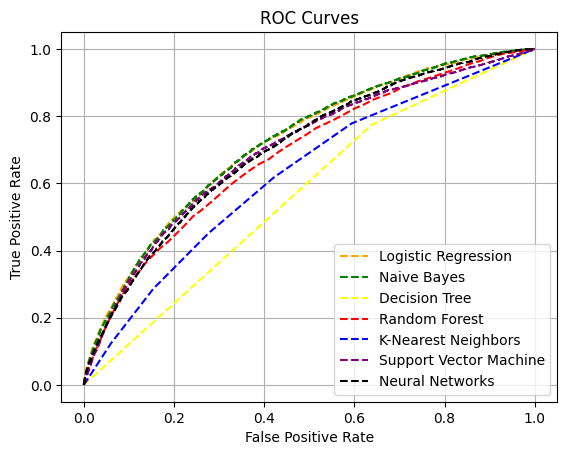

In [21]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "green", label = "Naive Bayes")
plt.plot(fpr3, tpr3, linestyle = "--", color = "yellow", label = "Decision Tree")
plt.plot(fpr4, tpr4, linestyle = "--", color = "red", label = "Random Forest")
plt.plot(fpr5, tpr5, linestyle = "--", color = "blue", label = "K-Nearest Neighbors")
plt.plot(fpr6, tpr6, linestyle = "--", color = "purple", label = "Support Vector Machine")
plt.plot(fpr7, tpr7, linestyle = "--", color = "black", label = "Neural Networks")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

Naive Bayes Model Prediction

In [23]:
from joblib import dump, load

# Store the model 
dump(nb_model, 'model.joblib')

# Load the model
loaded_model = load('model.joblib')

#Interact model with new dataset
new_data = pd.read_csv('NewApplicants.csv')
#Define feature vector and target variable
new_x = new_data.drop(['LoanID', 'Default'], axis=1)
new_y = new_data['Default']
# Find categorical variable, which is object type variable for training set data
new_x_categorical = new_x.select_dtypes(include=['object'])
print(new_x_categorical)
# Find numerical variable, which is int/float type variable for training set data
new_x_numerical = new_x.select_dtypes(exclude=['object'])
print(new_x_numerical)
# Encoding for new dataset
# Tranform categorical variable into quantitative variable
new_x_cat_encoded = pd.get_dummies(new_x_categorical, drop_first=True)
# Scale the numerical variables before concatenating with categorical variables
scaler = StandardScaler()
new_x_numerical_scaled = scaler.fit_transform(new_x_numerical)
# Convert scaled numerical variables into a DataFrame with column names
new_x_numerical_scaled_df = pd.DataFrame(new_x_numerical_scaled, columns=new_x_numerical.columns, index=new_x_numerical.index)
# Concatenate encoded categorical variables and scaled numerical variables
new_x_processed = pd.concat([new_x_numerical_scaled_df, new_x_cat_encoded], axis=1)
print(new_x_processed.head())

# Interact with the loaded model
predictions = loaded_model.predict(new_x_processed)

# Add predictions as a new column in the DataFrame
new_data['Default'] = predictions

# Display the new dataset with predictions
print(new_data)


      Education EmploymentType MaritalStatus HasMortgage HasDependents  \
0    Bachelor's      Full-time      Divorced         Yes           Yes   
1      Master's      Full-time       Married          No            No   
2      Master's     Unemployed      Divorced         Yes           Yes   
3   High School      Full-time       Married          No            No   
4    Bachelor's     Unemployed      Divorced          No           Yes   
5   High School     Unemployed        Single         Yes            No   
6    Bachelor's     Unemployed        Single         Yes            No   
7           PhD      Full-time       Married          No            No   
8    Bachelor's  Self-employed      Divorced         Yes            No   
9   High School  Self-employed       Married         Yes            No   
10          PhD  Self-employed        Single         Yes            No   
11          PhD      Full-time      Divorced         Yes           Yes   
12  High School      Part-time      Di